In [284]:
#######   EV CARS PRICE PREDICTION            

In [1538]:
########  OBJECTIVE

#   The objective of this project is to develop a Predictive model to forecast the price of electric cars 
#   based on their specifications and historic pricing data. The dataset contains information about various electric car models,
#   including features like vehicle type, CAFV eligibility, electric range, base MSRP and other relevant attributes that could 
#   influence the car price.
   

In [1539]:
### PROBLEM STATEMENT 

#      Which variables are significant in predicting the price of a car?
#      How well those variables describe the price of a car?

In [2053]:
#  The project aims to achieve the following goals:

#     Data collection and preprocessing 
#     EDA
#     Visualization 
#     Feature selection 
#     Model development 
#     Model evaluation
#     Model Validation
#     Deployment  & Reporting

In [2054]:
### IMPORT LIBRARIES 

In [2288]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from scipy import stats
from sklearn.impute import SimpleImputer


In [2289]:
### IMPORT DATA

In [2290]:
data = pd.read_csv("C:\\Users\\RAJESH KUMAR\\Desktop\\train.csv")


In [2291]:
data.head(5)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [2292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [2293]:
##### Treating Expected Price ($1k) column (coverting from object to float)

In [2294]:
# Replace 'N/' with NaN and then make the column type as float
data['Expected Price ($1k)'] = data['Expected Price ($1k)'].replace('N/', np.nan).astype(float)

In [2295]:
data.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Expected Price ($1k)
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04,64340.000000
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08,45.447970
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08,24.728205
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03,0.000000
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08,22.857000
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08,40.000000
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08,65.900000
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08,1100.000000


In [2296]:
##### DATA PREPROCESSING #####################################################################################################

In [2297]:
##### TREATING NULL VALUES ######

In [2298]:
data.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [2299]:
# fill null values with mean value
data['Expected Price ($1k)'].fillna(data['Expected Price ($1k)'].mean(), inplace=True)

In [2300]:
#  fill null values in categorical columns with mode
columns_to_fill = ['Vehicle Location','Electric Utility','County','City','State',
                   'ZIP Code','Model Year','Make','Model','Legislative District']                                               

# Fill null values in the selected columns with mode value
for col in columns_to_fill:
    mode_value = data[col].mode()[0]  # Get the mode value
    data[col].fillna(mode_value, inplace=True)

In [2301]:
data.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

In [2302]:
#### Feature Reduction 
## removing irrelevant features can improve model performance by reducing noise 
##  and focusing on the most important information. 

In [2303]:
column_to_drop =['Base MSRP','ZIP Code','DOL Vehicle ID']   ## removed Zip code and DOL vehicle Id from this list

In [2304]:
data.drop(column_to_drop, axis=1, inplace=True)

In [2305]:
## Numeric columns
numeric_columns=['Electric Range','Legislative District','Model Year','Expected Price ($1k)']


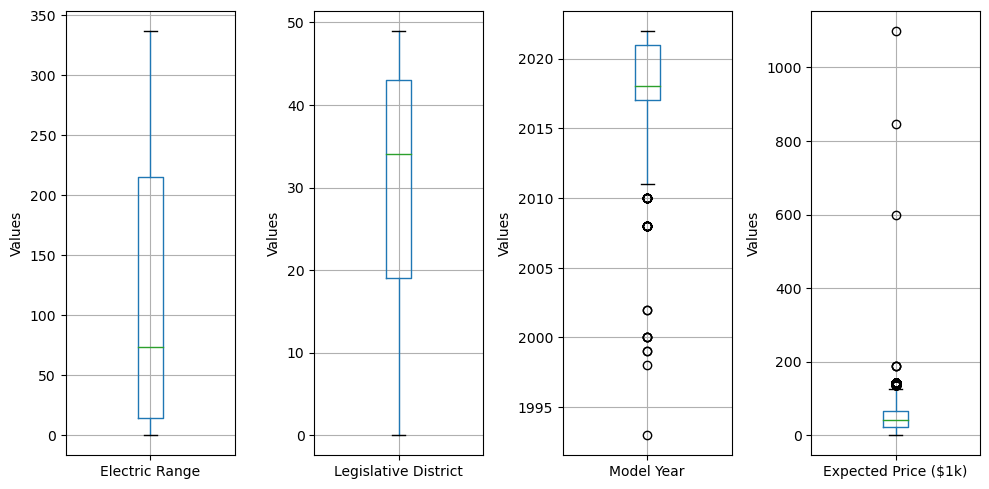

In [2306]:
# Create boxplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 5))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [2307]:
## TREATING OUTLIERS 

In [2308]:
selected_columns=['Model Year','Expected Price ($1k)']

In [2309]:
# Define a function to treat outliers using percentiles
def treat_outliers_percentile(column, lower_percentile=0.25, upper_percentile=0.75):
    q1 = column.quantile(lower_percentile)
    q3 = column.quantile(upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, q1, column)
    column = np.where(column > upper_bound, q3, column)
    return column

In [2310]:
# Treat outliers in selected columns using percentiles
for column in selected_columns:
    data[column] = treat_outliers_percentile(data[column])

In [2311]:
### Treating outliers by imputing upper and lower bounds

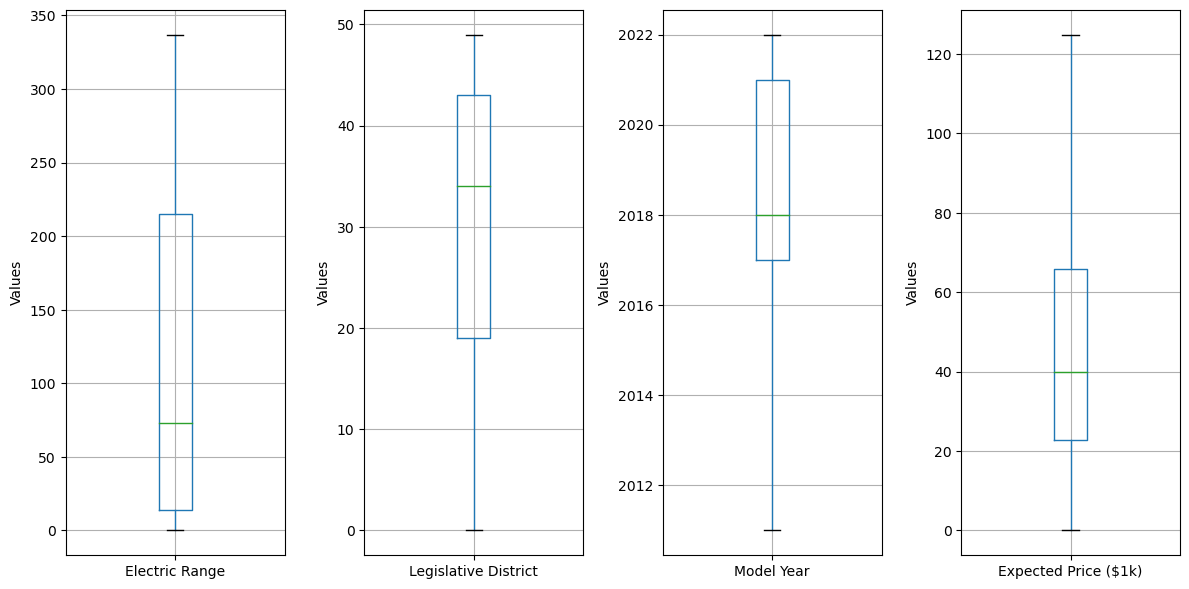

In [2312]:
# Create subplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 6))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [2313]:
##############################################################################################################################

In [2314]:
#### FEATURE ENGINEERING 

In [2315]:
###In our dataset, the Vehicle Location column contains both latitude and longitude coordinates as a string.
#### To make these coordinates more accessible for further analysis, we will perform the following feature engineering steps:

#Convert the Vehicle Location column to string type.
#Create two new columns in the DataFrame, latitude and longitude.
#Extract latitude and longitude values from the Vehicle Location column and store them in the respective new columns.

In [2316]:
import re
import geopandas as gpd

In [2317]:
# Convert the 'Vehicle Location' column to string type
data['Vehicle Location'] = data['Vehicle Location'].astype(str)

In [2318]:
# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

In [2319]:

data['latitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
data['longitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

data= data.dropna(subset=['latitude', 'longitude'])

In [2320]:
### Concatenate city, county, state as location

In [2321]:
data['Location'] = data['County'] + ', ' + data['City'] + ', ' + data['State']

In [2322]:
### conerting electric range category to a category column

In [2323]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    data['Electric_Range_Category'] = data[column].apply(categorize_range)
    return df

data = create_electric_range_category(data, column='Electric Range')


In [2324]:
######### VISUALIZATIONS #######

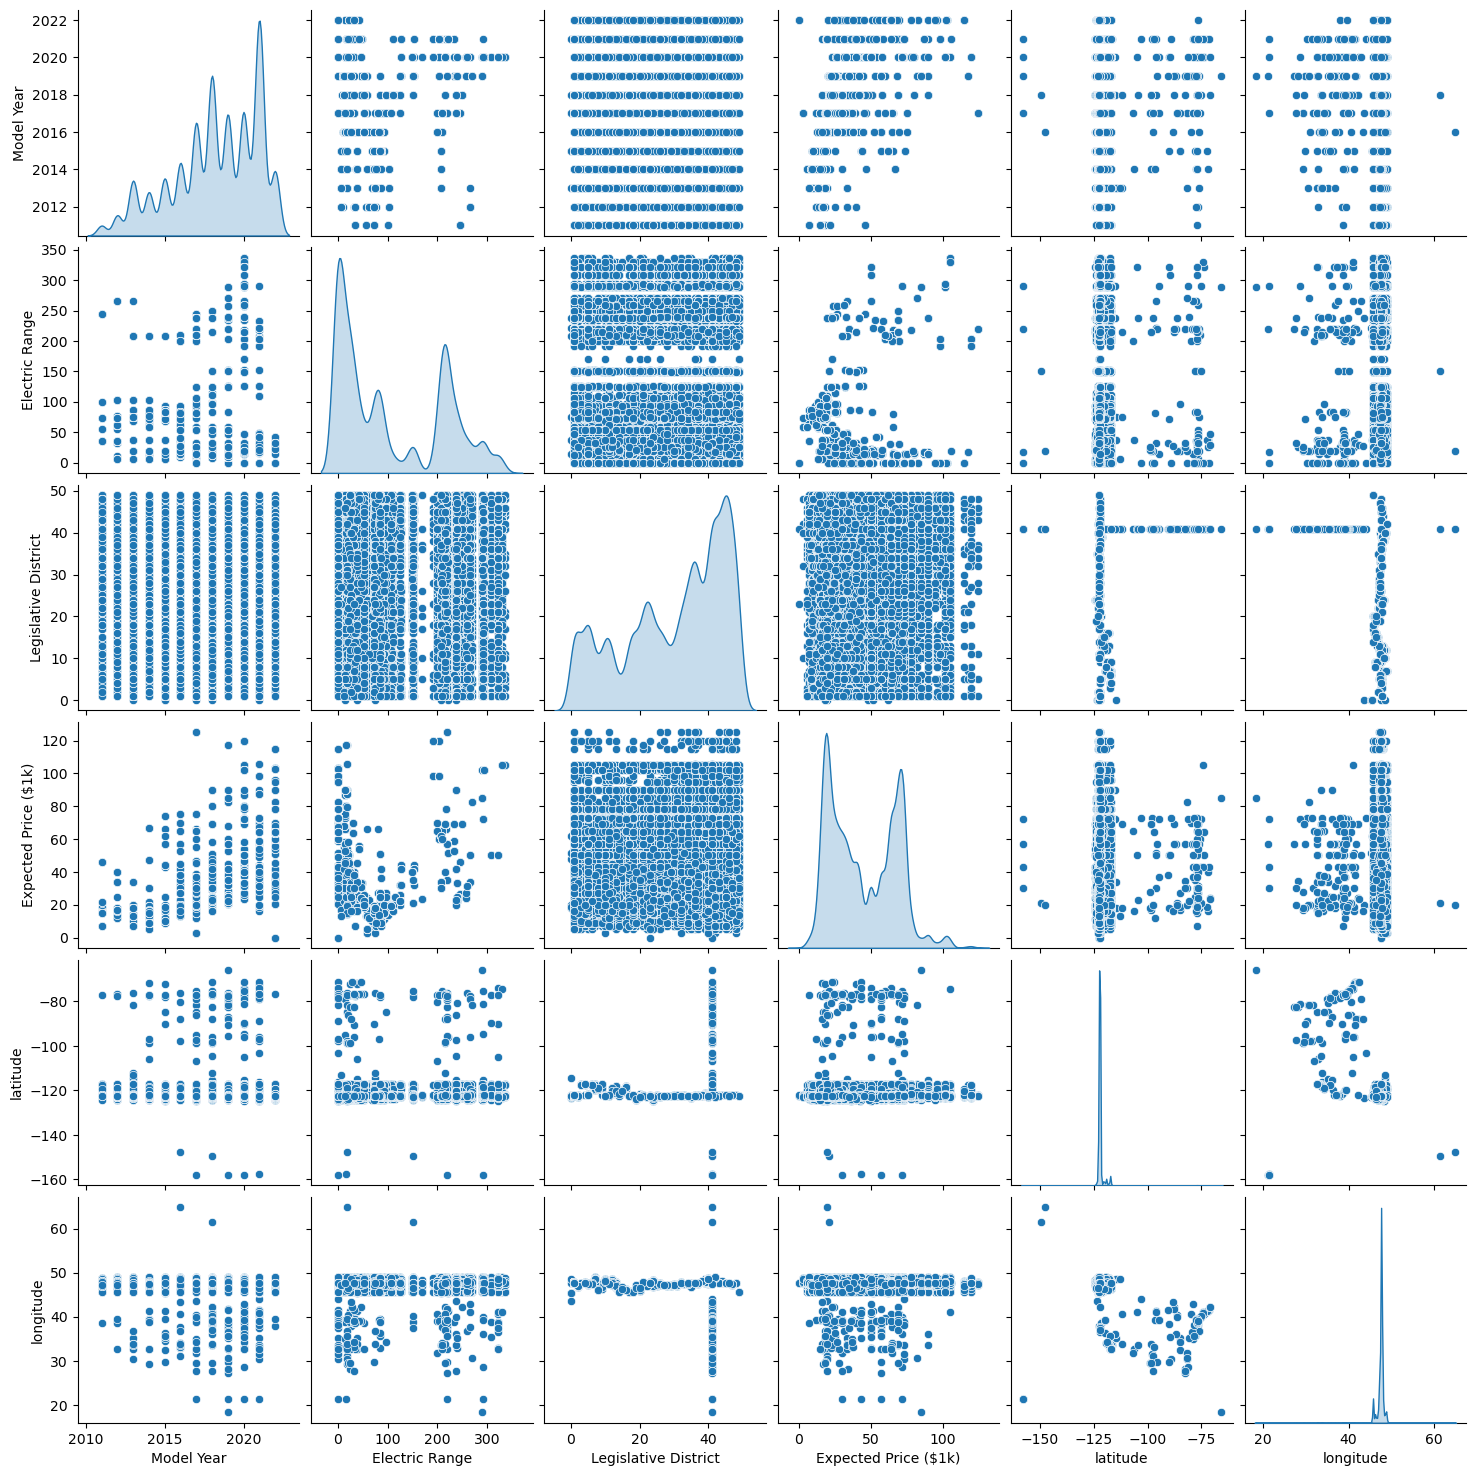

In [2325]:
# Create a pairplot
sns.pairplot(data, diag_kind='kde')  # diag_kind='kde' for kernel density plots on the diagonal
plt.show()

C:\Users\RAJESH KUMAR\AppData\Local\Temp\ipykernel_21256\3133334731.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")


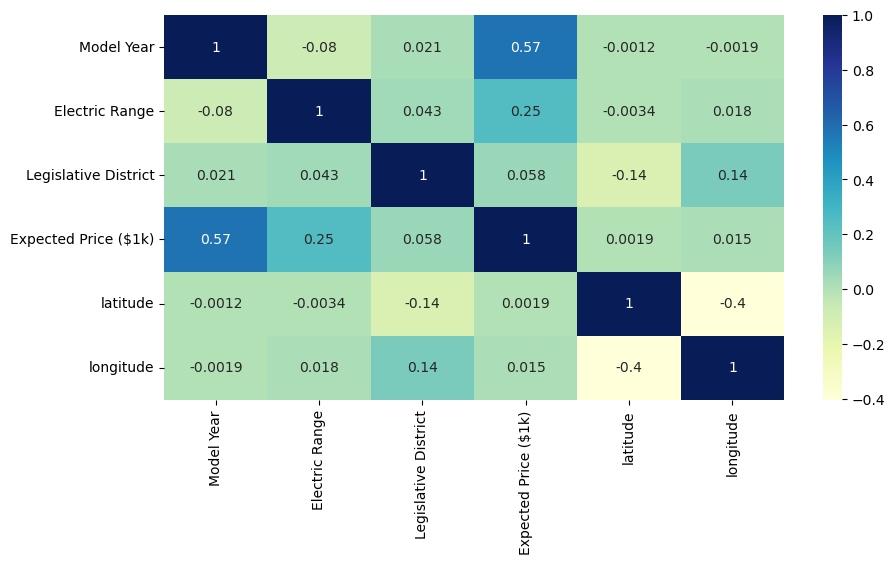

In [2326]:
#Correlation using heatmap
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [2327]:
## Univariate Analysis

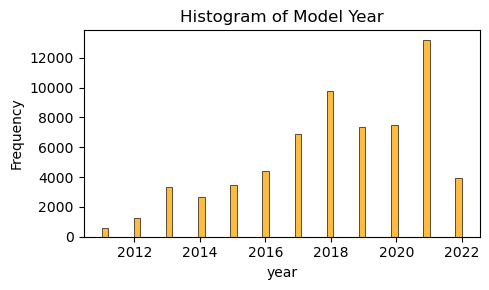

In [2328]:
# Create a histogram (histplot) for the model yearvariable using seaborn
plt.figure(figsize=(5,3))  # Set the figure size
sns.histplot(data['Model Year'], kde=False, color='orange')

# Add title and labels
plt.title('Histogram of Model Year')
plt.xlabel('year')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [2329]:
# INFERENCE
###  There's a steady rise in EV sales from 2011
###  Post 2018 there's a drop in sales for straight 2 years (could be a COVID impact)
###  Year 2021 witnessed a highest ever sales

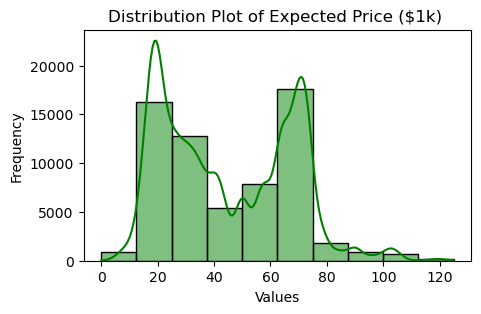

In [2330]:
# Create a distribution plot (histogram)
plt.figure(figsize=(5, 3))
sns.histplot(data['Expected Price ($1k)'], bins=10, kde=True,color='green')  
plt.title('Distribution Plot of Expected Price ($1k) ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [2331]:
# INFERENCE
### As seen from the above graph, most number of sales was recorded for the vehicles that 
### falls in the price bracket of  10Kto 30K
### Second highest sales was recorded in the price bracket  60Kto 70K

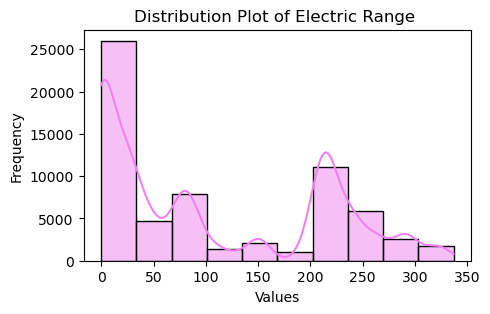

In [2332]:
# Create a distribution plot (histogram)
plt.figure(figsize=(5, 3))
sns.histplot(data['Electric Range'], bins=10, kde=True,color='violet')  
plt.title('Distribution Plot of Electric Range ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [2333]:
## INFERENCE
###Highest sold vehichles with respect to Electric range is in the following order:

#     0 to 30
#     200 to 225
#    60 to 80

In [2334]:
# Get value counts for each city
city_counts = data['City'].value_counts()

# Select top 10 city
top_10_city = city_counts.head(10)


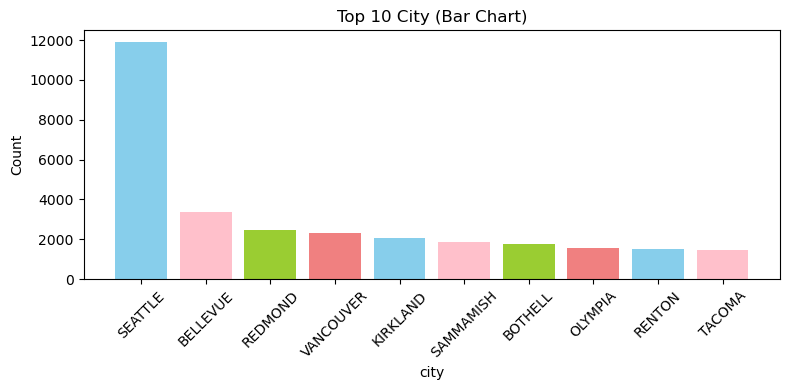

In [2335]:
# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(top_10_city.index, top_10_city, color=['skyblue','pink', 'yellowgreen', 'lightcoral'])
plt.title('Top 10 City (Bar Chart)')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2336]:
#  INFERENCE
### Seattle stands way ahead of other cities with highest volume of sales of EV cars with 12K qty.
### The city that ranks second has made a sales that's 1/3rd of Seattle city

In [2337]:
# Get value counts of counties
county_counts = data['County'].value_counts()

# Select top 5 counties
top_5_counties = county_counts.head(5)


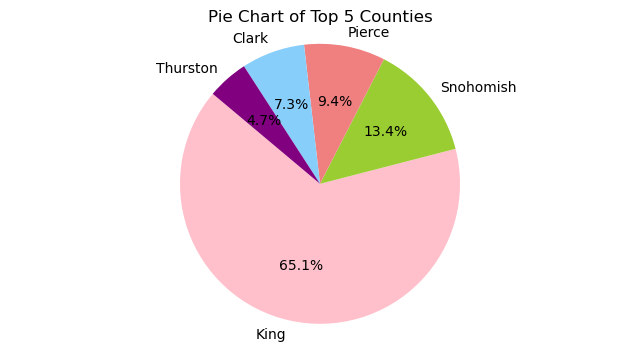

In [2338]:
# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(top_5_counties, labels=top_5_counties.index, autopct='%1.1f%%', startangle=140,
        colors = ['pink', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple'])
plt.title('Pie Chart of Top 5 Counties')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [2339]:
## INFERENCE
# With respect to County, King remains at the top followed by Snohomish, Pierce, Clark and Thurston

In [2340]:
# Get value counts of make
make_counts = data['Make'].value_counts()

# Select top 10 make
top_10_make = make_counts.head(10)


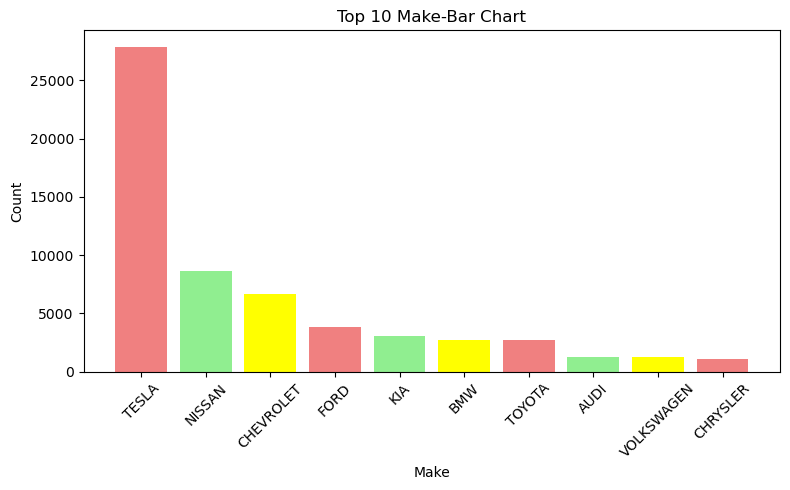

In [2341]:
# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_10_make.index, top_10_make, color=['lightcoral','lightgreen','yellow'])
plt.title('Top 10 Make-Bar Chart')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2342]:
# INFERENCE
### TESLA is the highest sold brand with a sales volume of more than 25K qty
#### It's followed by Nissan, Chevrolet, Ford, KIA and the rest

In [2343]:
# Get value counts of EV Type
EVType_counts = data['Electric Vehicle Type'].value_counts()

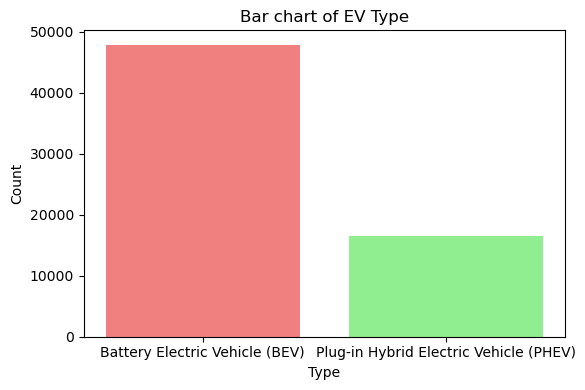

In [2344]:
# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(EVType_counts.index, EVType_counts, color=['lightcoral','lightgreen'])
plt.title('Bar chart of EV Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [2345]:
# INFERENCE
#####  When it comes to EV type, from the above graph we can clearly see that most number of customers
#### prefer BEV type compared to PHEV

In [2346]:
# Get value counts of CAFV Eligiblity
CAFV_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

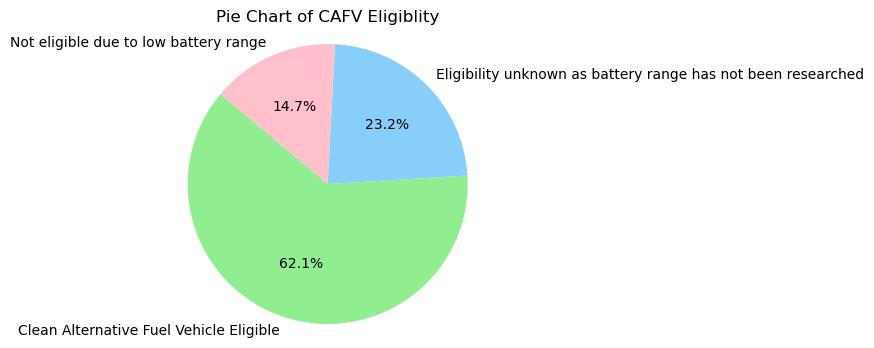

In [2347]:
# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(CAFV_counts, labels=CAFV_counts.index, autopct='%1.1f%%', startangle=140,
        colors = ['lightgreen', 'lightskyblue', 'pink'])
plt.title('Pie Chart of CAFV Eligiblity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [2348]:
# INFERENCE
####Out of all the EVs sold, 62.1% of the vehicles are considered as eligible for Clean Alternative Fuel Vehicle.

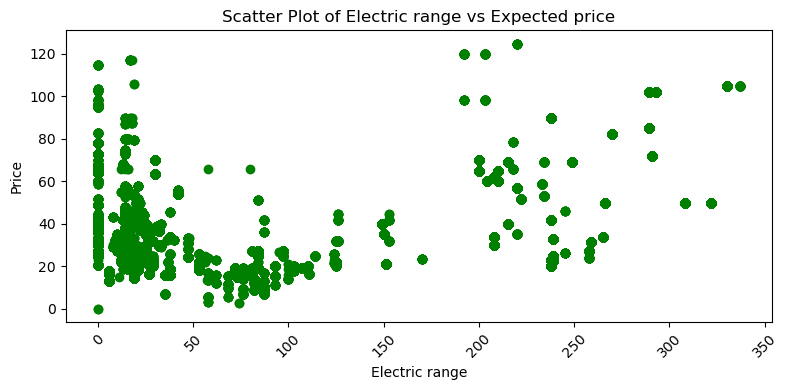

In [2349]:
# Create a scatter plot of Electric range vs Price 
plt.figure(figsize=(8, 4))
plt.scatter(data['Electric Range'], data['Expected Price ($1k)'], color='green')
plt.title('Scatter Plot of Electric range vs Expected price')
plt.xlabel('Electric range')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2350]:
# INFERENCE 
###   From the above scatter plot which shows the relation between Electric range and Expected price, 
## we don't see enough evidence to confirm if the price of the vehicle is completely dependent on the Electric range
#### which the vehicle offers

In [2351]:
# Get value counts of Electric range Category 
ERC_counts = data['Electric_Range_Category'].value_counts()


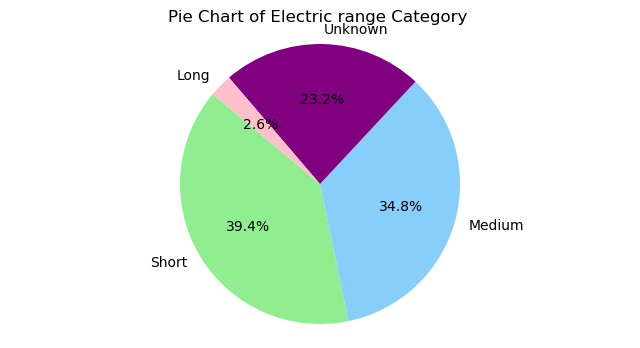

In [2352]:
# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(ERC_counts, labels=ERC_counts.index, autopct='%1.1f%%', startangle=140,
        colors = ['lightgreen', 'lightskyblue', 'purple','pink'])
plt.title('Pie Chart of Electric range Category ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [2353]:
# Inference 

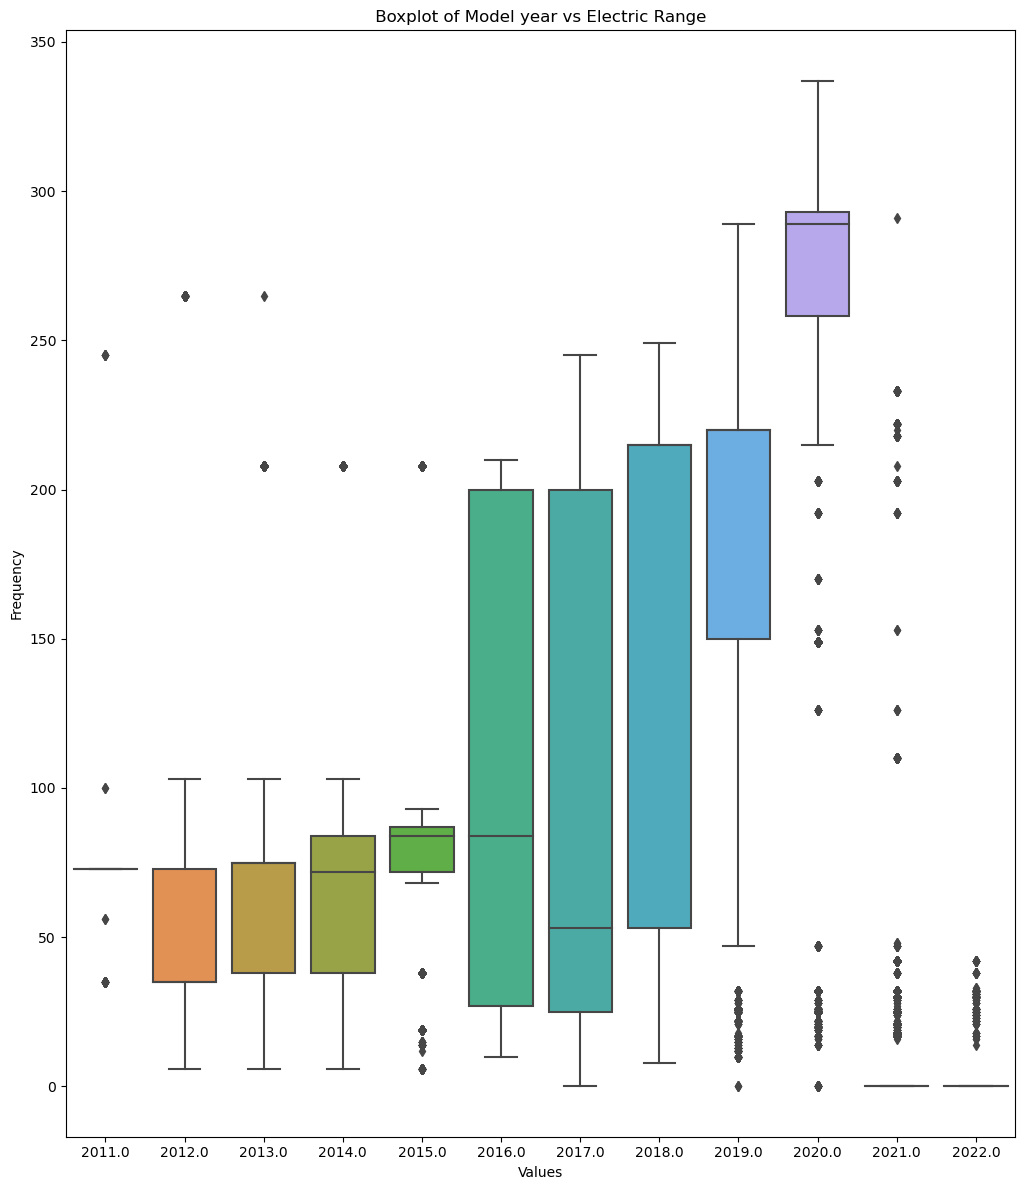

In [2354]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x = data['Model Year'], y = data['Electric Range'])
plt.title(' Boxplot of Model year vs Electric Range ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.tight_layout()


In [2355]:
## INFERENCE 
#The evolution of EV Vehicles has seen a remarkable improvement in the Electric range offered across years since it's inception.
#In the year 2012 the vehicle with highest electric range offered was 100 km (or) m, whereas in 2022 the vehicle with highest
#electric range offered was more than 300 km (or) m.

In [2356]:
# Calculate the top 10 makes by average electric range
top_makes = data.groupby('Make')['Electric Range'].mean().nlargest(10).index

In [2357]:
# Filter the DataFrame to include only the top 10 makes
data_top_makes = data[data['Make'].isin(top_makes)]

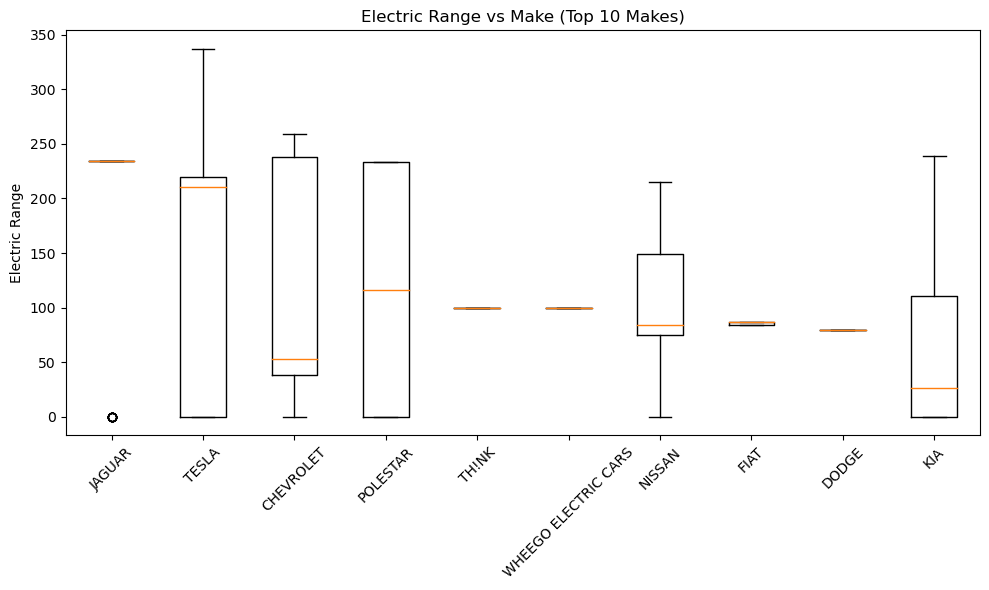

In [2358]:
# Step 3: Create the boxplot
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Electric Range vs Make (Top 10 Makes)')
plt.ylabel('Electric Range')
plt.boxplot([data_top_makes[data_top_makes['Make'] == make]['Electric Range'] for make in top_makes], labels=top_makes)
plt.tight_layout()

In [2359]:
# INFERENCE
###Tesla offers the highest electrical range of 340 km (or) m

In [2360]:
###############################################################################################################################

In [2361]:
### MODEL DEVELOPMENT

In [2362]:
data= data.drop(['ID','VIN (1-10)','Vehicle Location','Electric Utility','County','City','Model',
                 'State','Legislative District'], axis=1)
# dropping the above columns after considering feature importance and feature reduction factors 

In [2363]:
data.head()

,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Expected Price ($1k),latitude,longitude,Location,Electric_Range_Category
0,2020.0,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,50.00,-122.287614,47.838740,"Snohomish, LYNNWOOD, WA",Long
1,2011.0,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,15.00,-122.414936,48.709388,"Skagit, BELLINGHAM, WA",Short
2,2015.0,BMW,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,18.00,-122.396286,47.293138,"Pierce, TACOMA, WA",Short
3,2013.0,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,33.90,-122.024951,47.670286,"King, REDMOND, WA",Short
4,2019.0,CHEVROLET,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,41.78,-122.321062,47.103797,"Pierce, PUYALLUP, WA",Medium


In [2364]:
##########################################################################################################################

In [2365]:
###### MODEL 1: LINEAR REGRESSON WITH LABEL ENCODING 

In [2366]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2367]:
### CONVERT CATEGORICAL TO NUMERIC  BY LABEL ENCODING

In [2368]:
def convert_categorical_to_numeric(dataframe):
    label_encoder = LabelEncoder()
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = label_encoder.fit_transform(dataframe[column])

In [2369]:
convert_categorical_to_numeric(data)


In [2370]:
# Splitting data into Independent and Dependent Variable
X = data.drop('Expected Price ($1k)', axis=1)
y = data['Expected Price ($1k)']

In [2371]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [2372]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [2373]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [2374]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.5913322037139682
Mean Squared Error (MSE): 214.983726252875
Root Mean Squared Error (RMSE): 14.66
Mean Absolute Error (MAE): 11.42


In [2375]:
################################################################################################################################

In [2376]:
###### MODEL 2 : LINEAR REGRESSION USING DUMMIES ENCODING / ONE HOT ENCODING

In [2377]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Make'])


In [2378]:
# Split into features and target variable
X = data_encoded.drop(['Expected Price ($1k)','Location'], axis=1)
y = data_encoded['Expected Price ($1k)']

In [2379]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2380]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [2381]:
# Make predictions
y_pred = model.predict(X_test)

In [2382]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.8252971598387914
Mean Squared Error (MSE): 91.68837812445555
Root Mean Squared Error (RMSE): 9.58
Mean Absolute Error (MAE): 6.82


In [2383]:
##############################################################################################################################

In [2384]:
##### MODEL 3 : LINEAR REGRESSION WITH STANDARDIZED VALUE

In [2385]:
from sklearn.preprocessing import StandardScaler

In [2386]:
#Standardize the selected columns
selected_columns = ['Electric Range']  
scaler = StandardScaler()
data[selected_columns] = scaler.fit_transform(data[selected_columns])

In [2387]:
# Split into features and target variable
X = data.drop(['Expected Price ($1k)','latitude','longitude','Location','Electric_Range_Category'], axis=1)
y = data['Expected Price ($1k)']

In [2388]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2389]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [2390]:
# Make predictions
y_pred = model.predict(X_test_processed)

In [2391]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.49523979621172565
Mean Squared Error (MSE): 264.9106584896425
Root Mean Squared Error (RMSE): 16.28
Mean Absolute Error (MAE): 13.45


In [2392]:
##############################################################################################################################3

In [2393]:
### MODEL 4 : RANDOM FOREST REGRESSION

In [2394]:
from sklearn.ensemble import RandomForestRegressor

In [2395]:
# Split into features and target variable
X = data_encoded.drop(['Expected Price ($1k)','Location'], axis=1)
y = data_encoded['Expected Price ($1k)']

In [2396]:
# Split into features and target variable
#X = data.drop(['Expected Price ($1k)'], axis=1)
#y = data['Expected Price ($1k)']

In [2397]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2398]:
# Create and train the Random Forest Regression model
# You can adjust hyperparameters like n_estimators, max_depth, etc., as needed
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [2399]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [2400]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [2401]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.9762917755035937
Mean Squared Error (MSE): 12.44266349808688
Root Mean Squared Error (RMSE): 3.53
Mean Absolute Error (MAE): 1.02


In [2402]:
###############################################################################################################################

In [2403]:
#### MODEL 5: GRADIENT BOOSTING 

In [2404]:
from sklearn.ensemble import GradientBoostingRegressor

In [2405]:
# Split into features and target variable
X = data_encoded.drop(['Expected Price ($1k)','Location'], axis=1)
y = data_encoded['Expected Price ($1k)']

In [2406]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2407]:
# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [2408]:
# Train the Gradient Boosting Regressor on the training data
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [2409]:
# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

In [2410]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.9375731668021244
Mean Squared Error (MSE): 32.763148452981206
Root Mean Squared Error (RMSE): 5.72
Mean Absolute Error (MAE): 3.94


In [2411]:
#############################################################################################################################

In [2412]:
#### MODEL 6 : K-NEAREST NEIGHBOUR MODEL (KNN)

In [2413]:
from sklearn.neighbors import KNeighborsRegressor

In [2414]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2415]:
# Create and train the KNN regression model
k = 5  # Number of neighbors (you can adjust this value)
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [2416]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [2417]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.9745618212743077
Mean Squared Error (MSE): 13.350586330746122
Root Mean Squared Error (RMSE): 3.65
Mean Absolute Error (MAE): 1.11


In [2418]:
#############################################################################################################################

In [2419]:
## MODEL 7 : DECISION TREE REGRESSOR 

In [2420]:
from sklearn.tree import DecisionTreeRegressor

In [2421]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2422]:
# Create and train the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=5)  # You can adjust the max_depth parameter
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [2423]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [2424]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.8702760066970154
Mean Squared Error (MSE): 68.08236511096744
Root Mean Squared Error (RMSE): 8.25
Mean Absolute Error (MAE): 5.37


In [2425]:
###############################################################################################################################

In [2426]:
## MODEL 8 :GRADIENT BOOSTING WITH SELECTIVE INDEPENDENT VARIABLE

In [2427]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2428]:
# Get the design matrix (X) for the predictors
X = data[['Expected Price ($1k)', 'Model Year', 'Electric Range','latitude','longitude','Electric_Range_Category',
          'Location','Make' ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Vehicle Type' ]]

In [2429]:
# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [2430]:
# Display the VIF matrix
print(vif)

                                            Variable          VIF
0                               Expected Price ($1k)     9.155376
1                                         Model Year  5010.719712
2                                     Electric Range    22.114033
3                                           latitude  4697.960903
4                                          longitude  3969.633833
5                            Electric_Range_Category   106.324420
6                                           Location     5.065864
7                                               Make     9.998411
8  Clean Alternative Fuel Vehicle (CAFV) Eligibility     3.356439
9                              Electric Vehicle Type     4.879612


In [2431]:
# Split into features and target variable
# Select only the predictor variables (independent features) having VIF < 10
X = data[['Location','Make' ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Vehicle Type'] ]
y = data_encoded['Expected Price ($1k)']

In [2432]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2433]:
# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [2434]:
# Train the Gradient Boosting Regressor on the training data
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [2435]:
# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

In [2436]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.79528784182501
Mean Squared Error (MSE): 107.43801158642812
Root Mean Squared Error (RMSE): 10.37
Mean Absolute Error (MAE): 7.18


In [2437]:
###############################################################################################################################

In [2438]:
### MODEL 9 : RANDOM FOREST WITH VIF SCORE 

In [2439]:
from sklearn.ensemble import RandomForestRegressor

In [2440]:
# Split into features and target variable
# Select only the predictor variables (independent features) having VIF < 10
X = data[['Location','Make' ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Vehicle Type'] ]
y = data_encoded['Expected Price ($1k)']

In [2441]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2442]:
# Create and train the Random Forest Regression model
# You can adjust hyperparameters like n_estimators, max_depth, etc., as needed
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [2443]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [2444]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [2445]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.7947128591397639
Mean Squared Error (MSE): 107.73977674268555
Root Mean Squared Error (RMSE): 10.38
Mean Absolute Error (MAE): 6.88


In [2446]:
############################################################################################################################

In [2447]:
# MODEL 10 : log transforamtion 

In [2448]:
selected_columns = ['Electric Range']

In [2449]:
# Add a small constant to avoid zero or negative values
small_constant = 1e-10  # Adjust as needed
data[selected_column] += small_constant

In [2450]:
# Apply log transformation
data[selected_column] = np.log(data[selected_column])

C:\Users\RAJESH KUMAR\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [2451]:
# Splitting data into Independent and Dependent Variable
X = data.drop('Expected Price ($1k)', axis=1)
y = data['Expected Price ($1k)']

In [2452]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [2453]:
# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [2454]:
data = create_electric_range_category(data, column='Electric Range')

In [2455]:
###  MODEL EVALUATION

In [2456]:
# Create a list of model names and their corresponding metrics
models = ['LINEAR REGRESSION ', 'LINEAR REGRESSION(dummies) ', 'LINEAR REGRESSION (STANDARDIZED)','RANDOM FOREST',
          'GRADIENT BOOST','KNN','DECISION TREE','GRADIENT BOOST(VIF SCORE)','RANDOM FOREST(VIF SCORE)']
r2_scores= [0.59,0.82,0.49,0.97,0.93,0.97,0.87,0.79,0.79] 
rmse_scores = [14.66,9.58,16.28,3.53,5.72,3.65,8.25,10.37,10.38] 

In [2457]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model Name': models,
    'R2':r2_scores,
     'RMSE': rmse_scores
})

In [2458]:
# Display the results table
print(results_df)

                         Model Name    R2   RMSE
0                LINEAR REGRESSION   0.59  14.66
1       LINEAR REGRESSION(dummies)   0.82   9.58
2  LINEAR REGRESSION (STANDARDIZED)  0.49  16.28
3                     RANDOM FOREST  0.97   3.53
4                    GRADIENT BOOST  0.93   5.72
5                               KNN  0.97   3.65
6                     DECISION TREE  0.87   8.25
7         GRADIENT BOOST(VIF SCORE)  0.79  10.37
8          RANDOM FOREST(VIF SCORE)  0.79  10.38


In [2459]:
import pickle
with open("rf_regressor.pkl","wb") as file:
    pickle.dump(model,file)